In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use("seaborn-v0_8")

In [2]:
BASE_PATH = "/kaggle/input/plantvillage-dataset"
print(os.listdir(BASE_PATH))

['segmented', 'grayscale', 'plantvillage dataset', 'color']


In [3]:
IMAGE_ROOT = os.path.join(BASE_PATH, "color")
classes = sorted(os.listdir(IMAGE_ROOT))

print("Total number of classes:", len(classes))
print("Sample classes:", classes[:10])

Total number of classes: 38
Sample classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight']


## Dataset Structure

The PlantVillage dataset contains multiple variants of the same data.
For this analysis, we focus on the **color images**, as they best represent
real-world conditions where plant disease detection models would be deployed.

Each sub-folder inside the `color` directory represents a unique
**plant–disease combination**, encoded as:
PlantName___DiseaseName


In [4]:
class_data = []

for cls in classes:
    cls_path = os.path.join(IMAGE_ROOT, cls)
    image_count = len(os.listdir(cls_path))
    class_data.append([cls, image_count])

df_classes = pd.DataFrame(class_data, columns=["class_name", "image_count"])
df_classes.head()

,class_name,image_count
0,Apple___Apple_scab,630
1,Apple___Black_rot,621
2,Apple___Cedar_apple_rust,275
3,Apple___healthy,1645
4,Blueberry___healthy,1502


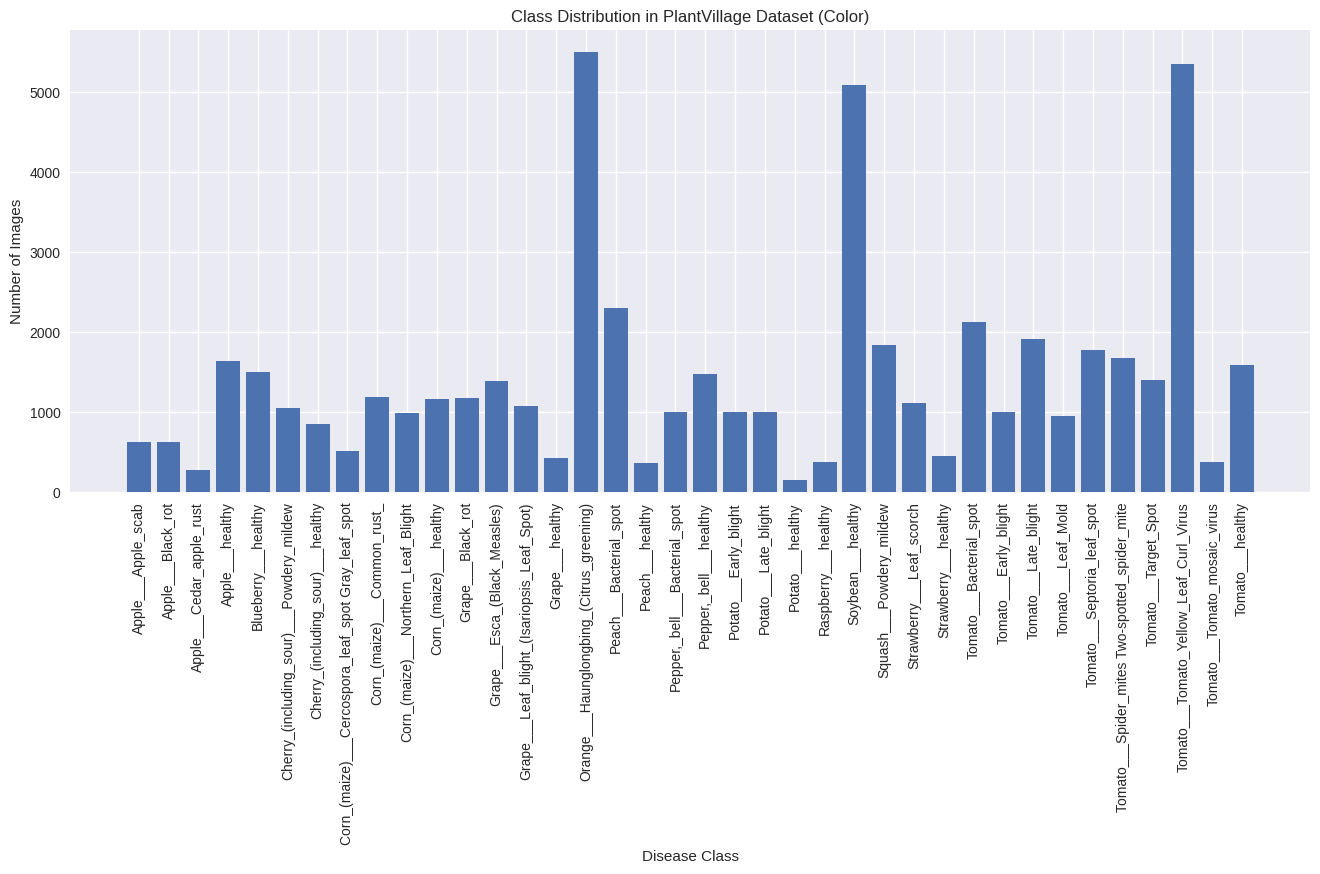

In [5]:
plt.figure(figsize=(16,6))
plt.bar(df_classes["class_name"], df_classes["image_count"])
plt.xticks(rotation=90)
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in PlantVillage Dataset (Color)")
plt.show()

## Class Distribution

The dataset shows noticeable **class imbalance**.
Certain diseases (especially for crops like tomato) are heavily overrepresented,
while others have significantly fewer samples.  
This imbalance can bias learning algorithms and must be addressed during
model training using techniques such as augmentation or class weighting.


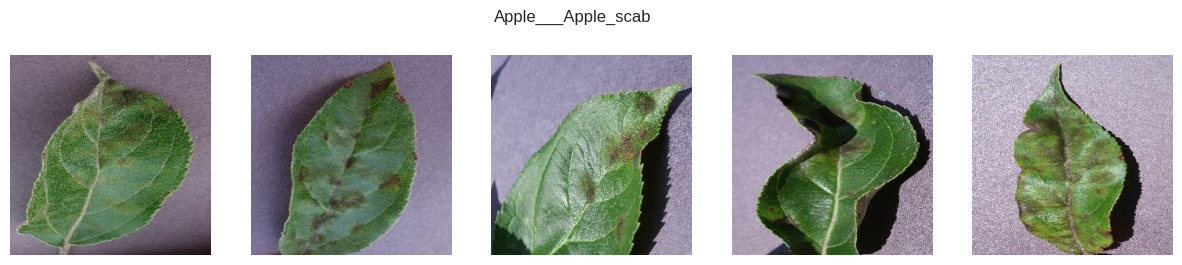

In [6]:
def show_sample_images(class_name, n=5):
    class_path = os.path.join(IMAGE_ROOT, class_name)
    images = random.sample(os.listdir(class_path), n)
    
    plt.figure(figsize=(15,3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(class_name)
    plt.show()

show_sample_images(classes[0])

## Visual Inspection of Disease Classes

By visualizing multiple samples per class, we observe that some disease classes
are visually very similar, even to the human eye.
This highlights the difficulty of the classification task and motivates the
use of robust feature extraction techniques.


In [7]:
widths, heights = [], []

for cls in classes[:5]:  # sample few classes for speed
    cls_path = os.path.join(IMAGE_ROOT, cls)
    for img_name in os.listdir(cls_path)[:30]:
        img = Image.open(os.path.join(cls_path, img_name))
        w, h = img.size
        widths.append(w)
        heights.append(h)

print("Width range:", min(widths), "-", max(widths))
print("Height range:", min(heights), "-", max(heights))

Width range: 256 - 256
Height range: 256 - 256


## Image Resolution Analysis

All sampled images have a uniform resolution of 256×256 pixels.
This indicates that the dataset has been preprocessed and standardized,
which simplifies model training. However, such uniformity may not fully
represent real-world scenarios where image sizes and aspect ratios vary.


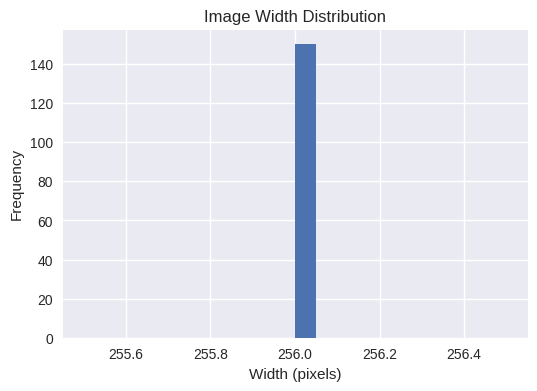

In [8]:
plt.figure(figsize=(6,4))
plt.hist(widths, bins=20)
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")
plt.show()

## Image Properties

Most images have similar resolutions, indicating controlled data collection.
However, minor variations in resolution and aspect ratio still exist, which
should be handled during preprocessing (e.g., resizing).



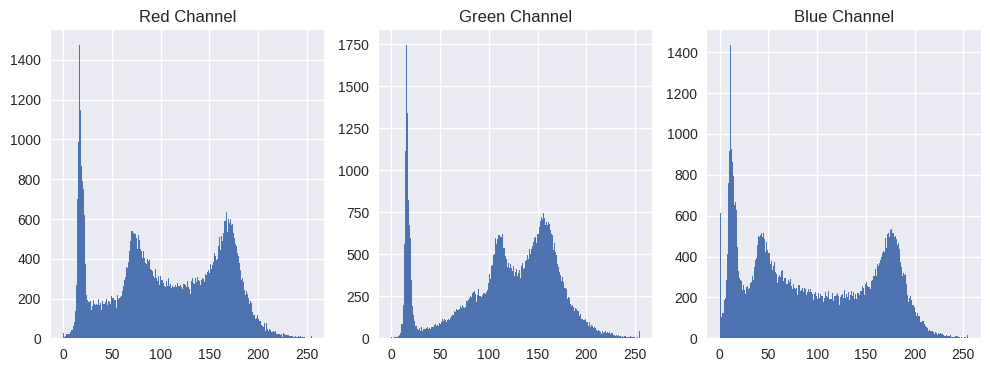

In [9]:
sample_class = classes[0] # by changing the class , we will see different results 
sample_path = os.path.join(IMAGE_ROOT, sample_class)

img = Image.open(os.path.join(sample_path, os.listdir(sample_path)[0]))
img_np = np.array(img)

plt.figure(figsize=(12,4))
for i, channel in enumerate(["Red", "Green", "Blue"]):
    plt.subplot(1,3,i+1)
    plt.hist(img_np[:,:,i].flatten(), bins=256)
    plt.title(f"{channel} Channel")
plt.show()

## Color Distribution

A representative sample image shows distinct RGB channel distributions,
with strong green intensity, highlighting the importance of color
information for disease detection.

RGB histograms for representative samples vary across disease classes,
indicating that color patterns differ depending on the type of disease.
This suggests that color information is a discriminative feature for
classification, but also highlights intra-class and inter-class variability.

Disease symptoms often manifest as color changes in leaves.
Analyzing RGB distributions confirms that color information is an important
feature for disease classification and justifies the use of color images.


## Key Observations & Insights

- The dataset is **class-imbalanced**, which may bias learning models toward
  frequently occurring diseases.
- Several disease classes exhibit strong **visual similarity**, making
  classification challenging even for humans.
- Most images are captured in controlled environments with clean backgrounds,
  which may limit real-world generalization.
- Color information plays a crucial role in identifying disease symptoms,
  validating the choice of color images for this study.
